# DS2500 Final Project Bitcoin Price Prediction

## Team -10

- Josh Hill (hill.jos@northeastern.edu)
- Jingkai Wang (wang.jingkai@northeastern.edu)
- Lijun Zhang (zhang.liju@northeastern.edu)
- Victor Zheng (zheng.vic@northeastern.edu)

# Introduction

### This project aims to predict price changes in Bitcoin using Bitcoin sentiment on Twitter.

# Data Description

## Dataset 1: Bitcoin Price Over Time

![The data shows here](https://i.ibb.co/jz0xGb3/2022-11-04-18-10-48.png)

![The data shows here](https://i.ibb.co/RcNJydR/Screenshot-2022-12-01-155907.png)

# Data Description

## Dataset 2: Bitcoin Related Tweets
#### Over 16 million tweets, from 2007 to 2019
![The data shows here](https://i.ibb.co/cL2cc81/Screenshot-2022-11-04-194347.png)

# Method

### 1. Analyzing Tweet Sentiment

We first read the tweets into a dictionary. Then we performed a sentiment analysis on the text of the tweets using the NLTK VADER library.

One the tweet was analyzed as positive, neutral, or negative, it was added to the count of that sentiment for that day, along with its likes, retweets, and replies.



In [5]:
df.head()

,date,pos_count,pos_reply,pos_like,pos_retweet,neg_count,neg_reply,neg_like,neg_retweet,neutral_count,neutral_reply,neutral_like,neutral_retweet,volume,marketcap,percent_price_change,percent_price_change_next_day
0,2013-04-29,1224,0,0,168,0,0,0,0,1360,0,4,84,0.0,1.603769e+09,-7.509441,3.472222
1,2013-04-30,1400,0,20,328,208,0,16,40,1196,12,20,148,0.0,1.542813e+09,3.472222,15.834534
2,2013-05-01,2212,0,4,436,232,0,16,44,1020,0,28,180,0.0,1.298955e+09,15.834534,9.597868
3,2013-05-02,1572,0,16,200,268,0,16,60,904,0,28,140,0.0,1.168517e+09,9.597868,8.000000
4,2013-05-03,1692,4,0,1460,268,0,4,52,808,0,8,96,0.0,1.085995e+09,8.000000,-14.678901


# Method

### Linear regression on Bitcoin price

We performed a linear regression on % change in Bitcoin price on a given day based on the aggregated Twitter sentiment for that day.

We also performed the same regression on the % change in Bitcoin's price for the next day. This would potentially enable investors to predict future price changes and make better investment decisions.

In [8]:
# RESULTS: regression for current day price change
lin = LinearRegression()
cv_results = cross_validate(lin, X, y_today, cv=5, scoring=('r2'), return_estimator=True)
print("cross validated R2 for btc_%change_day:")
print(cv_results['test_score'].mean())

cross validated R2 for btc_%change_day:
-0.3585907181305124


In [9]:
# RESULTS:
for model in cv_results['estimator']:
    coef = model.coef_
    equation = "y = "
    for i in range(len(features)):
        part = "(" + str(round(coef[i], 5)) + "*" + features[i] + ") + "
        equation += part
    equation += str(round(model.intercept_, 5))

print(equation + "\n")

y = (0.00021*pos_count) + (0.00013*pos_reply) + (1e-05*pos_like) + (-5e-05*pos_retweet) + (-8e-05*neg_count) + (5e-05*neg_reply) + (4e-05*neg_like) + (-8e-05*neg_retweet) + (-0.0001*neutral_count) + (-0.00015*neutral_reply) + (-0.0*neutral_like) + (3e-05*neutral_retweet) + -0.19425



In [10]:
# RESULTS: regression for next day price change
lin = LinearRegression()
cv_results = cross_validate(lin, X, y_next, cv=5, scoring=('r2'), return_estimator=True)
print("cross validated R2 for btc_%change_net_day:")
print(cv_results['test_score'].mean())

cross validated R2 for btc_%change_net_day:
-0.13381404836500493


In [30]:
# RESULTS:
for model in cv_results['estimator']:
    coef = model.coef_
    equation = "y = "
    for i in range(len(features)):
        part = "(" + str(round(coef[i], 5)) + "*" + features[i] + ") + "
        equation += part
    equation += str(round(model.intercept_, 5))
print(equation + "\n")

y = (0.00019*pos_count) + (1e-05*pos_reply) + (0.0*pos_like) + (-0.0*pos_retweet) + (-0.00021*neg_count) + (1e-05*neg_reply) + (1e-05*neg_like) + (-4e-05*neg_retweet) + (-0.0001*neutral_count) + (0.00014*neutral_reply) + (-1e-05*neutral_like) + (4e-05*neutral_retweet) + -0.25499



# Results

### Decision Tree on Bitcoin Tweet Sentiment Dataframe

The decision tree is to classify the tweet data, to find whether the data can be divided into different parts for analysis, and to make the mse become 0. When the results is fit the set, the classifier continues down the right side of the tree, and continues to analyze.

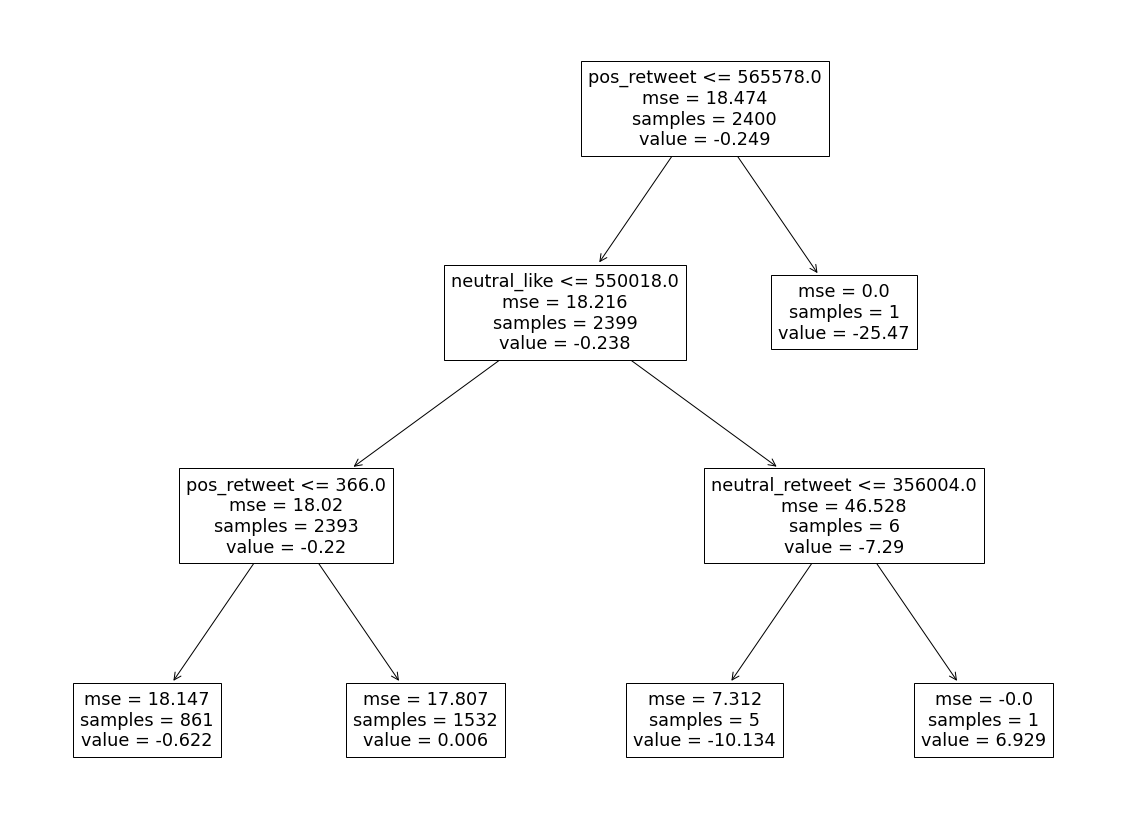

In [21]:
dec_tree = train_dec_tree_tweet(df_tweet, max_depth=3, plot=True)

# Results

### Feature Importance Graph From Random Forest Regressor

The random forest classifier is to find the important feature in the tweet data, the higher the feature importnace in the plot, the more important the feature is in determining percent price change.

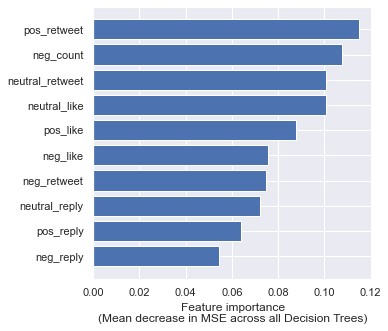

In [28]:
sns.set()

plot_feat_import(x_feat_list, rf_clf.feature_importances_, limit=10)

# Takeaways

To create an improved Bitcoin price change predictor:

- We could use a different sentiment analysis tool, such as one that gives scalar values for sentiment rather than binary ones.


- If this is ineffective, we could also run regressions using change in total tweets for a given day, since tweet sentiment may be too hard to determine.


- We could also try to predict absolute changes in Bitcoin price. Predicting volatility would still be useful, even if we are unable to predict the direction of the volatility (positive or negative).

Our analysis/regresssion should not be used to predict changes in Bitcoin price or explain variation in Bitcoin price, as our R^2 values were below 0.